Primeiramente importei as bibliotecas que irei ultilizar. As bibliotecas ajudam na leitura dos dados e criação de graficos e insights.
As Biblitoecas são:
Pandas
Matplotlib
Numpy

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Coleta dos dados, baixar e importar os dados da para o ambiente


In [29]:



# Carregando os dados do CSV para um DataFrame
caminho_arquivo= r"/Users/taian/estudos/projetofinal/intartificial.csv"


df_ia = pd.read_csv(caminho_arquivo)

# Visualizando as primeiras linhas do DataFrame para entender a estrutura dos dados
df_ia.head()


,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,NaN,NaN,https://farm3d.github.io/?utm_source=futureped...,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,NaN,https://www.trymaverick.com/?utm_source=future...,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,NaN,NaN,https://0xai.quest?utm_source=futurepedia&utm_...,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,NaN,NaN,https://10web.io/?utm_source=futurepedia&utm_m...,code


ANALISE EXPLORATÓRIA E LIMPEZA DOS DADOS
# analisando informações dos dados 
# analisando dados nulos

In [30]:
df_ia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AI Tool Name     4969 non-null   object
 1   Description      4969 non-null   object
 2   Free/Paid/Other  4969 non-null   object
 3   Useable For      4969 non-null   object
 4   Charges          2534 non-null   object
 5   Review           1462 non-null   object
 6   Tool Link        4969 non-null   object
 7   Major Category   4969 non-null   object
dtypes: object(8)
memory usage: 310.7+ KB


In [31]:
df_ia.isnull().sum()

AI Tool Name          0
Description           0
Free/Paid/Other       0
Useable For           0
Charges            2435
Review             3507
Tool Link             0
Major Category        0
dtype: int64

Renomeando as colunas para português

In [32]:
# Mapeando os novos nomes das colunas
mapeamento_colunas = {
    'AI Tool Name': 'Nome da Ferramenta de IA',
    'Description': 'Descrição',
    'Free/Paid/Other': 'Gratuito/Pago/Outro',
    'Useable For': 'Usado Para',
    'Charges': 'Custos',
    'Review': 'Avaliação',
    'Tool Link': 'Link da Ferramenta',
    'Major Category': 'Categoria Principal',
  
}

# Renomeando as colunas
df_traduzido = df.rename(columns=mapeamento_colunas)

# Visualizando as primeiras linhas do DataFrame com colunas traduzidas
df_traduzido.head()


,Nome da Ferramenta de IA,Descrição,Gratuito/Pago/Outro,Usado Para,Custos,Avaliação,Link da Ferramenta,Categoria Principal,Comprimento da Descrição
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,NaN,NaN,https://farm3d.github.io/?utm_source=futureped...,other,58
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text,60
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,NaN,https://www.trymaverick.com/?utm_source=future...,audio,46
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,NaN,NaN,https://0xai.quest?utm_source=futurepedia&utm_...,image,45
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,NaN,NaN,https://10web.io/?utm_source=futurepedia&utm_m...,code,60


Excluindo colunas que não contribuirão para a analise.



In [36]:
# Excluindo a coluna de links 
df_sem_links = df.drop('Tool Link', axis=1)
#drop exclui a coluna desejada

# Visualizando
df_sem_links.head()


,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Major Category,Comprimento da Descrição
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,NaN,NaN,other,58
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,text,60
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,NaN,audio,46
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,NaN,NaN,image,45
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,NaN,NaN,code,60


In [37]:
df_ia.describe(include='all').T

,count,unique,top,freq
AI Tool Name,4969,4969,Farm3D,1
Description,4969,4965,Understand any data instantly using AI,2
Free/Paid/Other,4969,19,Free,1704
Useable For,4969,526,/ productivity,247
Charges,2534,557,$ 10/mo,99
Review,1462,17,1,942
Tool Link,4969,4959,https://www.trymaverick.com/?utm_source=future...,2
Major Category,4969,8,business,1202


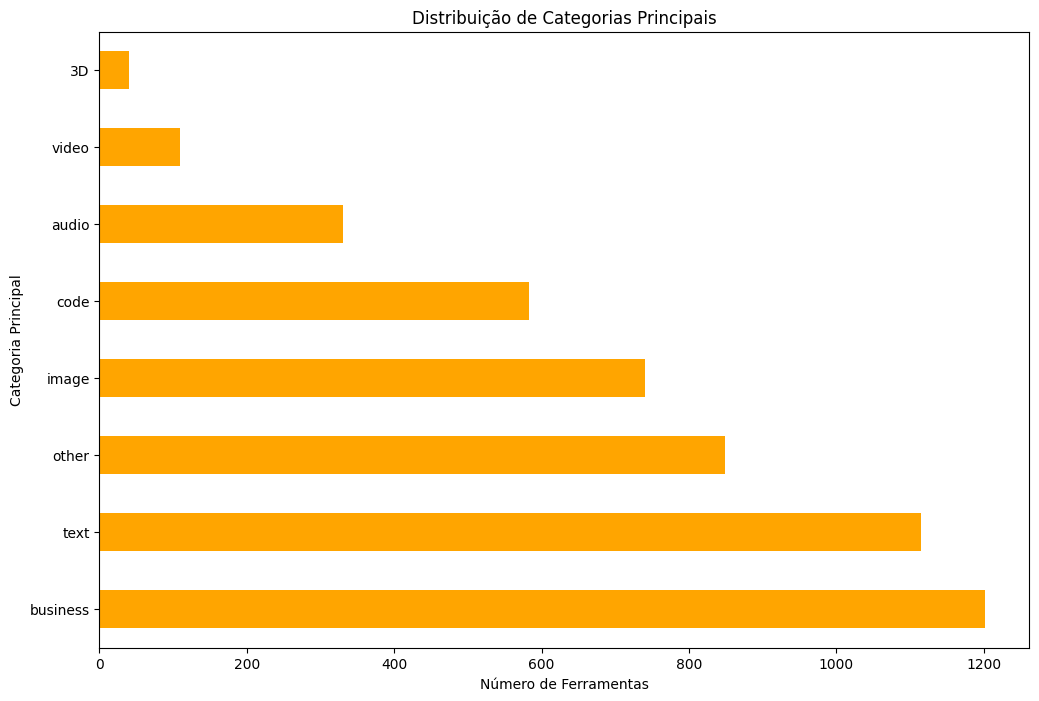

In [11]:
# Visualizando a distribuição de categorias principais
plt.figure(figsize=(12, 8))
df['Major Category'].value_counts().plot(kind='barh', color='orange')
plt.title('Distribuição de Categorias Principais')
plt.xlabel('Número de Ferramentas')
plt.ylabel('Categoria Principal')
plt.show()


A partir da analise. A categoria de IA mais ultilizada para uso de negocios. 